# Processing the Image1 Processing

I downloaded and preprocessing the information using a plugin on QGIS (Basically, I downloaded the jp2 sentinel data and preprocesss it to convert it into a raster file (tif) with 3 bands). Now, I am going to convert to tif into a image knowing that:
 - Band 1: Band 2 from original file Blue
 - Band 2: Band 2 from original file Green
 - Band 3: Band 2 from original file Red

In [4]:
import rasterio
from rasterio import plot
import rasterio
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import PIL # pillow - image processing
#import cv2 as cv

%matplotlib inline

In [5]:
import os
os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\Tutorial_1\Testing_satellite_image\Sentinel_testing_image\Place1")

# Libraries

In [6]:
tif = 'place1.tif'
bands_RGB = rasterio.open(tif)
#band2 = rasterio.open(tif).read(1)/1000.0 #Blue 
#band3 = rasterio.open(tif).read(2)/1000.0 #Green
#band4 = rasterio.open(tif).read(3)/1000.0 #Red
band2 = rasterio.open(tif).read(1) #Blue 
band3 = rasterio.open(tif).read(2) #Green
band4 = rasterio.open(tif).read(3) #Red

In [10]:
new_band2 = band2/1000.0
new_band3 = band3/1000.0
new_band4 = band4/1000.0
print(new_band2.max())
print(new_band2.min())

18.448
0.001


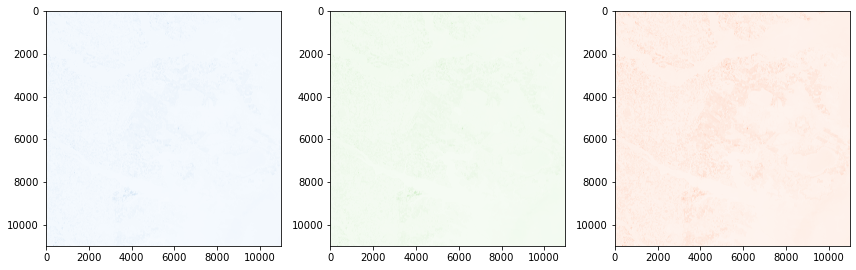

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
plot.show(new_band2, ax = ax1, cmap='Blues')
plot.show(new_band3, ax = ax2, cmap='Greens')
plot.show(new_band4, ax = ax3, cmap='Reds')
fig.tight_layout()

In [6]:
print(band2)
print(band2.shape)
print(band2.min())
print(band2.max())

[[691 738 711 ... 412 434 416]
 [659 712 666 ... 427 429 433]
 [659 704 664 ... 408 388 424]
 ...
 [277 284 279 ... 481 444 491]
 [256 257 271 ... 462 476 486]
 [233 257 251 ... 449 481 457]]
(10980, 10980)
1
18448


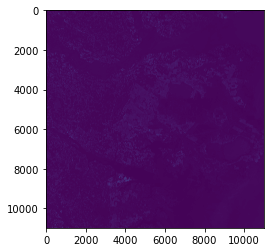

<AxesSubplot:>

In [7]:
plot.show(band2)

In [8]:
a = np.array([[0, 2, 3],[4, 10, 6],[7, 8, 5]])
print(a)

[[ 0  2  3]
 [ 4 10  6]
 [ 7  8  5]]


In [9]:
a.shape[0]

3

In [10]:
b = a.reshape((a.shape[0]*a.shape[1],1))
b

array([[ 0],
       [ 2],
       [ 3],
       [ 4],
       [10],
       [ 6],
       [ 7],
       [ 8],
       [ 5]])

In [11]:
scaler = MinMaxScaler()
c = scaler.fit_transform(b)
c

array([[0. ],
       [0.2],
       [0.3],
       [0.4],
       [1. ],
       [0.6],
       [0.7],
       [0.8],
       [0.5]])

In [12]:
d = c.reshape(a.shape[0],a.shape[1])
d

array([[0. , 0.2, 0.3],
       [0.4, 1. , 0.6],
       [0.7, 0.8, 0.5]])

# Scaling the data from 0 - 1

## Band2

In [13]:
band2

array([[691, 738, 711, ..., 412, 434, 416],
       [659, 712, 666, ..., 427, 429, 433],
       [659, 704, 664, ..., 408, 388, 424],
       ...,
       [277, 284, 279, ..., 481, 444, 491],
       [256, 257, 271, ..., 462, 476, 486],
       [233, 257, 251, ..., 449, 481, 457]], dtype=uint16)

In [14]:
band2_01_reshape = band2.reshape((band2.shape[0]*band2.shape[1],1))
band2_01_reshape

array([[691],
       [738],
       [711],
       ...,
       [449],
       [481],
       [457]], dtype=uint16)

In [15]:
scaler = MinMaxScaler()
band2_01_scale = scaler.fit_transform(band2_01_reshape)
band2_01_scale

array([[0.03740446],
       [0.0399523 ],
       [0.03848864],
       ...,
       [0.02428579],
       [0.02602049],
       [0.02471947]])

In [16]:
band2_01 = band2_01_scale.reshape(band2.shape[0],band2.shape[1])
band2_01

array([[0.03740446, 0.0399523 , 0.03848864, ..., 0.02228005, 0.02347265,
        0.02249688],
       [0.03566976, 0.03854285, 0.03604922, ..., 0.02309319, 0.0232016 ,
        0.02341844],
       [0.03566976, 0.03810918, 0.0359408 , ..., 0.02206321, 0.02097902,
        0.02293056],
       ...,
       [0.01496178, 0.01534125, 0.0150702 , ..., 0.02602049, 0.02401474,
        0.02656258],
       [0.01382339, 0.0138776 , 0.01463653, ..., 0.02499051, 0.02574944,
        0.02629154],
       [0.01257657, 0.0138776 , 0.01355234, ..., 0.02428579, 0.02602049,
        0.02471947]])

## Band 3 - Green

In [17]:
print(band3.min())
print(band3.max())

1
17328


In [18]:
band3

array([[1022, 1076, 1082, ...,  521,  527,  517],
       [1008, 1066, 1072, ...,  498,  518,  512],
       [ 993, 1076, 1013, ...,  512,  496,  515],
       ...,
       [ 463,  439,  416, ...,  609,  581,  620],
       [ 433,  417,  440, ...,  645,  601,  600],
       [ 384,  427,  433, ...,  611,  606,  596]], dtype=uint16)

In [19]:
band3_01_reshape = band3.reshape((band3.shape[0]*band3.shape[1],1))
band3_01_reshape

array([[1022],
       [1076],
       [1082],
       ...,
       [ 611],
       [ 606],
       [ 596]], dtype=uint16)

In [20]:
scaler = MinMaxScaler()
band3_01_scale = scaler.fit_transform(band3_01_reshape)
band3_01_scale

array([[0.05892538],
       [0.0620419 ],
       [0.06238818],
       ...,
       [0.03520517],
       [0.0349166 ],
       [0.03433947]])

In [21]:
band3_01 = band3_01_scale.reshape(band3.shape[0],band3.shape[1])
band3_01

array([[0.05892538, 0.0620419 , 0.06238818, ..., 0.03001097, 0.03035725,
        0.02978011],
       [0.05811739, 0.06146477, 0.06181105, ..., 0.02868356, 0.02983783,
        0.02949154],
       [0.05725169, 0.0620419 , 0.05840596, ..., 0.02949154, 0.02856813,
        0.02966469],
       ...,
       [0.02666359, 0.02527847, 0.02395106, ..., 0.03508974, 0.03347377,
        0.03572459],
       [0.02493219, 0.02400877, 0.02533618, ..., 0.03716743, 0.03462804,
        0.03457032],
       [0.02210423, 0.02458591, 0.02493219, ..., 0.03520517, 0.0349166 ,
        0.03433947]])

## Band 4 - Red

In [22]:
print(band4.min())
print(band4.max())

1
16608


In [23]:
band4

array([[1188, 1230, 1168, ...,  518,  505,  503],
       [1160, 1230, 1114, ...,  488,  491,  494],
       [1154, 1232, 1048, ...,  462,  486,  505],
       ...,
       [ 396,  410,  416, ...,  557,  551,  568],
       [ 395,  405,  415, ...,  560,  539,  576],
       [ 345,  372,  384, ...,  534,  528,  531]], dtype=uint16)

In [24]:
band4_01_reshape = band4.reshape((band4.shape[0]*band4.shape[1],1))
band4_01_reshape

array([[1188],
       [1230],
       [1168],
       ...,
       [ 534],
       [ 528],
       [ 531]], dtype=uint16)

In [25]:
scaler = MinMaxScaler()
band4_01_scale = scaler.fit_transform(band4_01_reshape)
band4_01_scale

array([[0.07147588],
       [0.07400494],
       [0.07027157],
       ...,
       [0.0320949 ],
       [0.03173361],
       [0.03191425]])

In [26]:
band4_01 = band4_01_scale.reshape(band4.shape[0],band4.shape[1])
band4_01

array([[0.07147588, 0.07400494, 0.07027157, ..., 0.03113145, 0.03034865,
        0.03022822],
       [0.06978985, 0.07400494, 0.06701993, ..., 0.02932498, 0.02950563,
        0.02968628],
       [0.06942855, 0.07412537, 0.0630457 , ..., 0.02775938, 0.02920455,
        0.03034865],
       ...,
       [0.02378515, 0.02462817, 0.02498946, ..., 0.03347986, 0.03311856,
        0.03414223],
       [0.02372494, 0.02432709, 0.02492925, ..., 0.0336605 , 0.03239598,
        0.03462395],
       [0.02071416, 0.02233998, 0.02306256, ..., 0.0320949 , 0.03173361,
        0.03191425]])

In [27]:
print(band4_01.min())
print(band4_01.max())

0.0
1.0


# Normalizing the data saving the image

In [28]:
print(band2_01)
print(band3_01)
print(band4_01)

[[0.03740446 0.0399523  0.03848864 ... 0.02228005 0.02347265 0.02249688]
 [0.03566976 0.03854285 0.03604922 ... 0.02309319 0.0232016  0.02341844]
 [0.03566976 0.03810918 0.0359408  ... 0.02206321 0.02097902 0.02293056]
 ...
 [0.01496178 0.01534125 0.0150702  ... 0.02602049 0.02401474 0.02656258]
 [0.01382339 0.0138776  0.01463653 ... 0.02499051 0.02574944 0.02629154]
 [0.01257657 0.0138776  0.01355234 ... 0.02428579 0.02602049 0.02471947]]
[[0.05892538 0.0620419  0.06238818 ... 0.03001097 0.03035725 0.02978011]
 [0.05811739 0.06146477 0.06181105 ... 0.02868356 0.02983783 0.02949154]
 [0.05725169 0.0620419  0.05840596 ... 0.02949154 0.02856813 0.02966469]
 ...
 [0.02666359 0.02527847 0.02395106 ... 0.03508974 0.03347377 0.03572459]
 [0.02493219 0.02400877 0.02533618 ... 0.03716743 0.03462804 0.03457032]
 [0.02210423 0.02458591 0.02493219 ... 0.03520517 0.0349166  0.03433947]]
[[0.07147588 0.07400494 0.07027157 ... 0.03113145 0.03034865 0.03022822]
 [0.06978985 0.07400494 0.06701993 ... 

In [29]:
bands_norm = np.zeros((band4_01.shape[0],band4_01.shape[1],3))
bands_norm[:,:,0] = band4_01
bands_norm[:,:,1] = band3_01
bands_norm[:,:,2] = band2_01

MemoryError: Unable to allocate 2.69 GiB for an array with shape (10980, 10980, 3) and data type float64

In [41]:
plt.imshow(bands_norm[1:1000,1:1000,:])

NameError: name 'bands_norm' is not defined

# Just dividing the data into 1000 and saving the image

In [11]:
print(new_band2)
print(new_band3)
print(new_band4)

[[0.691 0.738 0.711 ... 0.412 0.434 0.416]
 [0.659 0.712 0.666 ... 0.427 0.429 0.433]
 [0.659 0.704 0.664 ... 0.408 0.388 0.424]
 ...
 [0.277 0.284 0.279 ... 0.481 0.444 0.491]
 [0.256 0.257 0.271 ... 0.462 0.476 0.486]
 [0.233 0.257 0.251 ... 0.449 0.481 0.457]]
[[1.022 1.076 1.082 ... 0.521 0.527 0.517]
 [1.008 1.066 1.072 ... 0.498 0.518 0.512]
 [0.993 1.076 1.013 ... 0.512 0.496 0.515]
 ...
 [0.463 0.439 0.416 ... 0.609 0.581 0.62 ]
 [0.433 0.417 0.44  ... 0.645 0.601 0.6  ]
 [0.384 0.427 0.433 ... 0.611 0.606 0.596]]
[[1.188 1.23  1.168 ... 0.518 0.505 0.503]
 [1.16  1.23  1.114 ... 0.488 0.491 0.494]
 [1.154 1.232 1.048 ... 0.462 0.486 0.505]
 ...
 [0.396 0.41  0.416 ... 0.557 0.551 0.568]
 [0.395 0.405 0.415 ... 0.56  0.539 0.576]
 [0.345 0.372 0.384 ... 0.534 0.528 0.531]]


In [12]:
bands = np.zeros((new_band4.shape[0],new_band4.shape[1],3))
bands[:,:,0] = new_band4
bands[:,:,1] = new_band3
bands[:,:,2] = new_band2

In [13]:
bands.shape

(10980, 10980, 3)

In [14]:
bands[:,:,2].max()

18.448

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


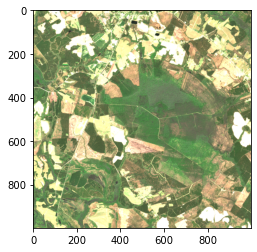

In [15]:
plt.imshow(bands[1:1000,1:1000,:])

# Saving Image

In [16]:
bands_clipped = bands[0:1000,0:1000,:]
img_paths = 'place1.png'
tf.keras.preprocessing.image.save_img(img_paths, bands_clipped, data_format=None, file_format=None, scale=True)

In [17]:
true_color = rasterio.open('place1_rbg_tif.tif','w',driver = 'Gtiff', width = bands_RGB.width, height = bands_RGB.height,
                          count = 3, crs=bands_RGB.crs, transform = bands_RGB.transform, dtype='float64')
true_color.write(new_band2,3) # Blue
true_color.write(new_band3,2) # Green
true_color.write(new_band4,1) # Red
true_color.close()